# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\maksh\AppData\Local\Temp\ipykernel_32228\3107362156.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


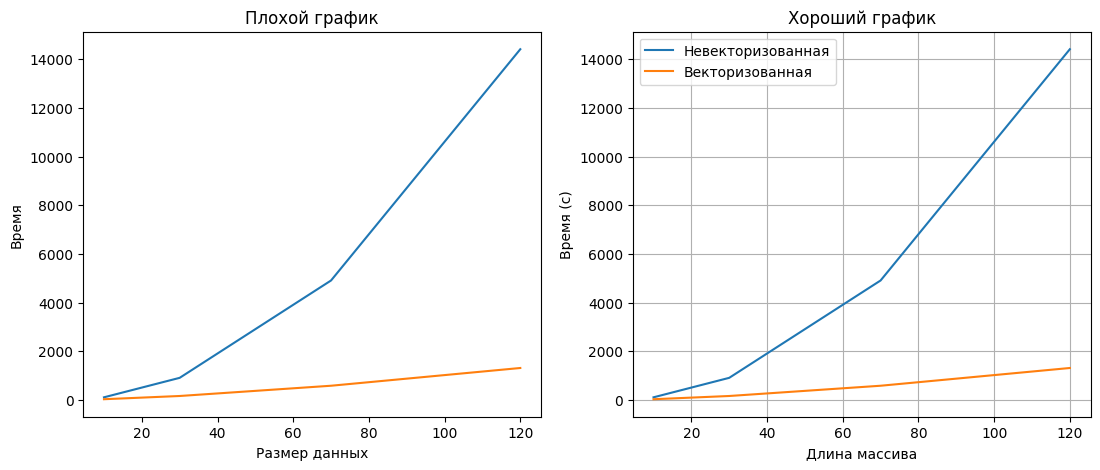

In [63]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

1
1001
2001
3001
4001
5001
6001
7001
8001
9001


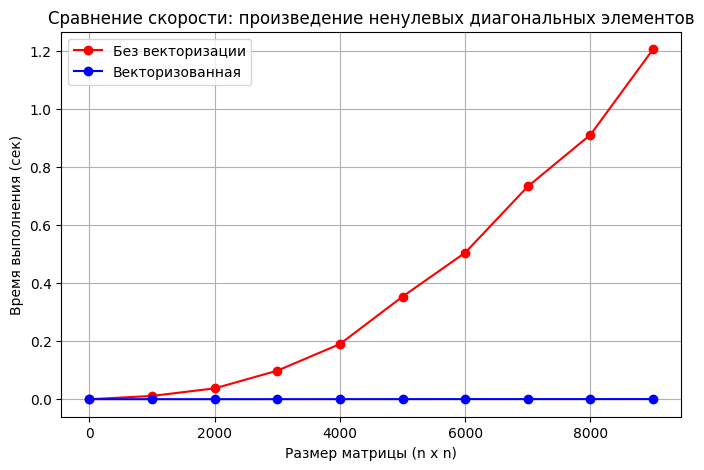

In [15]:
# code here
import numpy as np
import matplotlib.pyplot as plt
import time
def diagonal_product(matrix):
    prod = 1
    n = min(len(matrix), len(matrix[0]))  
    for i in range(n):
        if matrix[i][i] != 0:
            prod *= matrix[i][i]
    return prod

def diagonal_product_vectorized(X: np.ndarray) -> int:
    diag = np.diag(X)             
    diag_nonzero = diag[diag != 0] 
    if diag_nonzero.size == 0:    
        return 1
    return np.prod(diag_nonzero)
sizes = []
for n in range(1,  10000, 1000):
    sizes.append(n)
times_nonvec = []
times_vec = []

for n in sizes:
    print(n)
    X = np.random.randint(0, 10, size=(n, n))

    start = time.time()
    diagonal_product(X.tolist())
    times_nonvec.append(time.time() - start)

    start = time.time()
    diagonal_product_vectorized(X)
    times_vec.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(sizes, times_nonvec, "r-o", label="Без векторизации")
plt.plot(sizes, times_vec, "b-o", label="Векторизованная")
plt.xlabel("Размер матрицы (n x n)")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение скорости: произведение ненулевых диагональных элементов")
plt.legend()
plt.grid(True)
plt.show()



 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


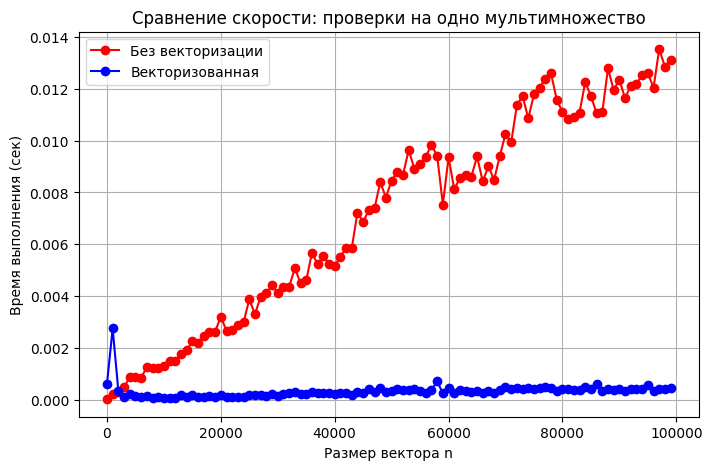

In [ ]:

# code here
import numpy as np
import matplotlib.pyplot as plt
import time
def same_multiset_np(x, y):
    ux, cx = np.unique(x, return_counts=True)
    uy, cy = np.unique(y, return_counts=True)
    return np.array_equal(ux, uy) and np.array_equal(cx, cy)
def same_multiset(x, y):
    x.sort()
    y.sort()
    return x == y
    
sizes = []
for n in range(1, 100000, 1000):
    sizes.append(n)
times_nonvec = []
times_vec = []

for n in sizes:
    X = np.random.randint(0, 30, size=(n))
    Y = np.random.randint(0, 30, size=(n))

    start = time.time()
    same_multiset(X.tolist(), Y.tolist())
    times_nonvec.append(time.time() - start)

    start = time.time()
    same_multiset_np(X, Y)
    times_vec.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(sizes, times_nonvec, "r-o", label="Без векторизации")
plt.plot(sizes, times_vec, "b-o", label="Векторизованная")
plt.xlabel("Размер вектора n")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение скорости: проверки на одно мультимножество")
plt.legend()
plt.grid(True)
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

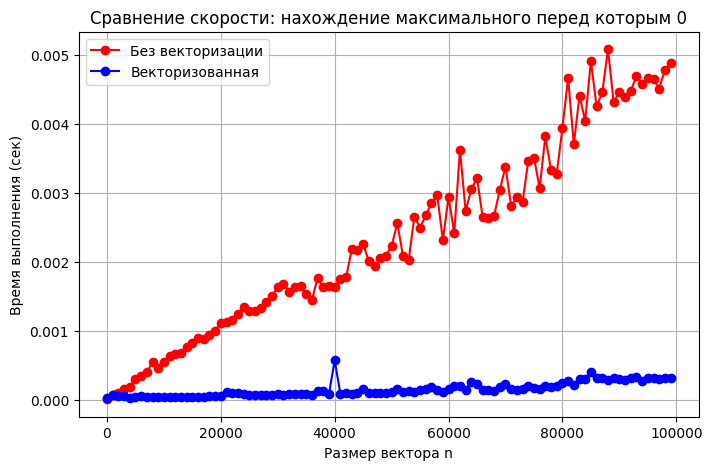

In [ ]:

# code here
import numpy as np
import math
import matplotlib.pyplot as plt
import time
def mxnum(x):
    mask = np.zeros_like(x, dtype=bool)
    mask[1:] = (x[:-1] == 0)
    arr = x[mask]
    if arr.size == 0:
        return None
    return arr.max()

def mx(x):
    mx = -(math.inf)
    for i in range (len(x)):
        if i !=0 and x[i-1] == 0 and x[i]>mx:
            mx = x[i]
    return mx
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

sizes = []
for n in range(2, 100000, 1000):
    sizes.append(n)
times_nonvec = []
times_vec = []

for n in sizes:
    X = np.random.randint(0, 10, size=(n))

    start = time.time()
    mx(X.tolist())
    times_nonvec.append(time.time() - start)

    start = time.time()
    mxnum(X)
    times_vec.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(sizes, times_nonvec, "r-o", label="Без векторизации")
plt.plot(sizes, times_vec, "b-o", label="Векторизованная")
plt.xlabel("Размер вектора n")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение скорости: нахождение максимального перед которым 0")
plt.legend()
plt.grid(True)
plt.show()    

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


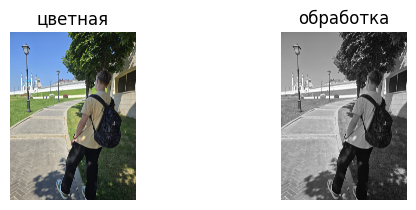

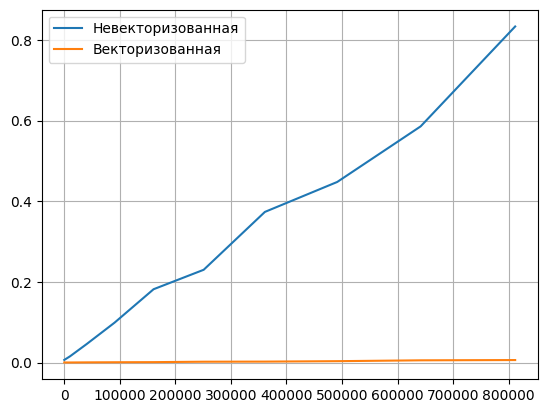

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time


image_ = cv2.imread("image.png", 1)
image_ = image_[:,:,::-1]
weights = np.array([0.299, 0.587, 0.114])
def weighted_sum_py(image, weights):
    height = len(image)
    width = len(image[0])    
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] += image[i][j][0] * weights[0] + image[i][j][1] * weights[1] + image[i][j][2] * weights[2]
            
    return result
    
def weighted_sum_np(image, weights):
    return np.dot(image, weights)
    


gray_image_py = weighted_sum_py(image_, weights)
gray_image_np = weighted_sum_np(image_, weights)


X = []
Y = []
Y_np = []

for i in range(1, 1000, 100):
    matrix = np.random.randint(0, 1, size=(i, i, 3))
    vec = np.random.randint(0, 1, size=3)
    
    X.append(i * i)

    start_time = time.time()
    img_convert = weighted_sum_py(matrix, vec)
    end_time = time.time()

    Y.append(end_time - start_time)

    start_time = time.time()
    img_convert_np = weighted_sum_np(matrix, vec)
    end_time = time.time()
    Y_np.append(end_time - start_time)




img_array_gray = weighted_sum_np(image_, weights)

plt.subplot(2, 2, 1)
plt.imshow(image_)
plt.title("цветная")    
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_array_gray, cmap="gray")
plt.title("обработка")
plt.axis("off")

plt.figure()
plt.plot(X, Y, label=u"Невекторизованная")
plt.plot(X, Y_np, label=u"Векторизованная")

plt.grid()
plt.legend()
plt.show()


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

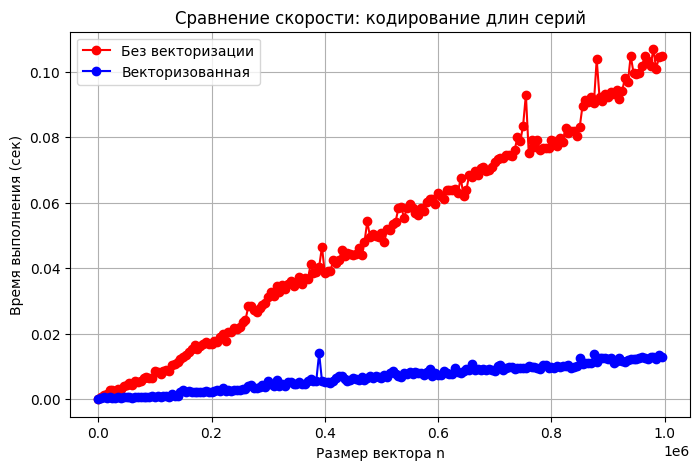

In [12]:
# code here
import numpy as np
import matplotlib.pyplot as plt
import time
def python(x):
    numbers = []
    counter = []
    prevind = 0
    for i in range (len(x)):
        if i == 0:
            numbers.append(x[0])
        elif x[i]!= x[prevind]:
            numbers.append(x[i])
            counter.append(i-prevind)
            prevind = i
    counter.append(len(x) - prevind)
    return numbers, counter
def diff_np(x):
    dif = (x[1:]-x[:-1])
    dif = np.insert(dif, 0, 1)
    dif = (dif!=0)    
    numbers = x[dif]
    indexes = np.where(dif == True)
    indexes = np.append(indexes, len(x))
    counter = (indexes[1:]-indexes[:-1])
    return numbers, counter
sizes = []
for n in range(2, 1000000, 5000):
    sizes.append(n)
times_nonvec = []
times_vec = []

for n in sizes:
    X = np.random.randint(0, 10, size=(n))

    start = time.time()
    python(X.tolist())
    times_nonvec.append(time.time() - start)

    start = time.time()
    diff_np(X)
    times_vec.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(sizes, times_nonvec, "r-o", label="Без векторизации")
plt.plot(sizes, times_vec, "b-o", label="Векторизованная")
plt.xlabel("Размер вектора n")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение скорости: кодирование длин серий")
plt.legend()
plt.grid(True)
plt.show()  

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

2
502
1002
1502
2002
2502
3002
3502
4002
4502


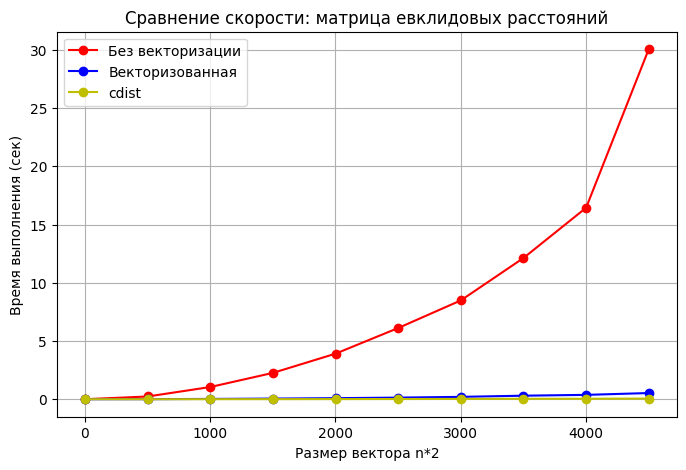

In [14]:
# code here
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import time
import math
def cd(x, y):
    d = cdist(x, y, metric='euclidean')
    return d
def python (x, y):
    d = [[0 for _ in range(len(x))] for _ in range(len(y))]
    for i in range(len(x)):
        for j in range(len(y)):
            ob = x[i]
            res = 0
            for k in range(len(ob)):
                res+=(x[i][k] - y[j][k])**2
        d[j][i] = math.sqrt(res)
def euclidean_distance_np(X, Y):

    diff = X[:, np.newaxis, :] - Y[np.newaxis, :, :]  
    D = np.sqrt(np.sum(diff**2, axis=2))         
    return D
sizes = []
for n in range(2, 5000, 500):
    sizes.append(n)
times_nonvec = []
times_vec = []
times_cd = []

for n in sizes:
    x = np.random.rand(n, 2)
    y = np.random.rand(n, 2)
    start = time.time()
    python(x, y)
    times_nonvec.append(time.time() - start)

    start = time.time()
    euclidean_distance_np(x, y)
    times_vec.append(time.time() - start)

    start = time.time()
    cd(x, y)
    times_cd.append(time.time() - start)
    print(n)
plt.figure(figsize=(8, 5))
plt.plot(sizes, times_nonvec, "r-o", label="Без векторизации")
plt.plot(sizes, times_vec, "b-o", label="Векторизованная")
plt.plot(sizes, times_cd, "y-o", label = "cdist")
plt.xlabel("Размер вектора n*2")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение скорости: матрица евклидовых расстояний")
plt.legend()
plt.grid(True)
plt.show()  

        

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

### Отчёт _(краткий)_

При работе с **большими** векторами `NumPy` работает значительно ~~медленнее~~ быстрее, чем обычные циклы *Python.*
